In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [88]:
sheet = '1'

In [89]:
# Imports the patient dataset and drops unneccessary rows/columns
df = pd.read_excel('Data/ALL_PMS_Patient_Biolog_data_NORMALIZED.xlsx', sheet_name='PM-M' + sheet)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
df = df.drop('well', axis=1)
dfNames = df['CMS#']
df = df.drop('CMS#', axis=1)

In [90]:
# Imports the control dataset and drops unneccessary rows/columns
df_control = pd.read_excel('Data/ABS_Normalized Control_PMS data.xlsx', sheet_name='PM-M' + sheet + '_Control')
df_control = df_control[4:]

# Removes the first 59 columns, which were raw data
cols = df_control.columns.tolist()
to_remove = cols[0:59] + cols[109:]
df_control = df_control.loc[:, ~df_control.columns.isin(to_remove)]

In [91]:
#Converts the dataframes to NumPy arrays
arrayControl = df_control.to_numpy()
arrayPatient = df.to_numpy()
print(arrayControl.shape)
print(arrayPatient.shape)

(96, 50)
(96, 48)


/var/folders/zy/xt7x1_rx3dq_b9wgfc5qj_g00000gn/T/ipykernel_17074/1515752724.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


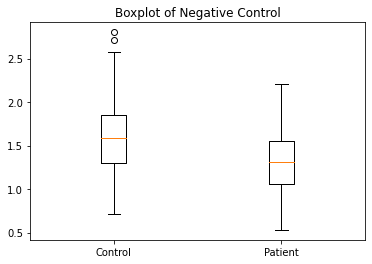

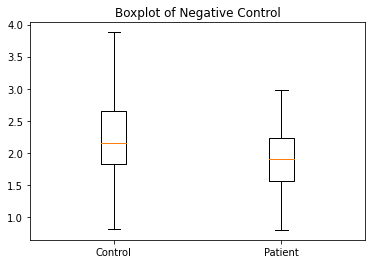

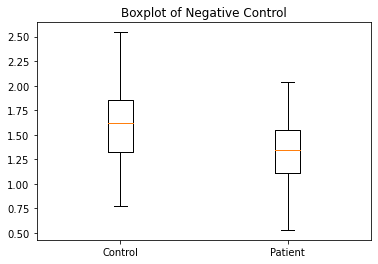

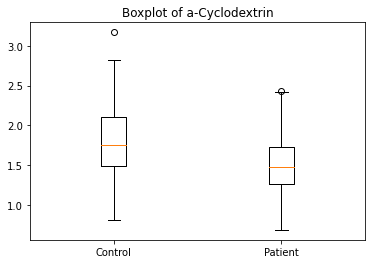

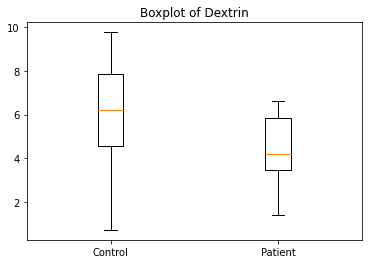

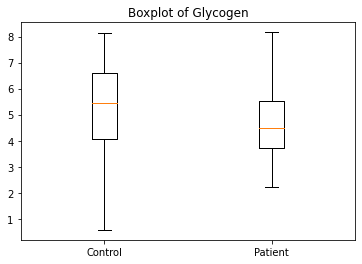

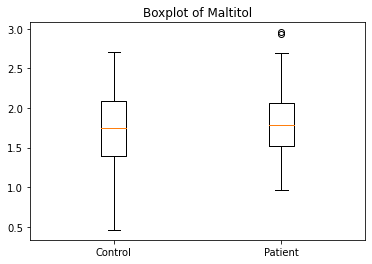

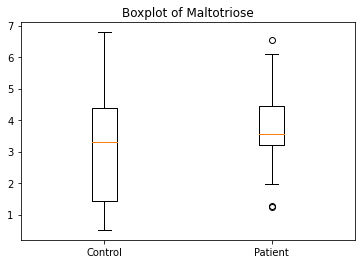

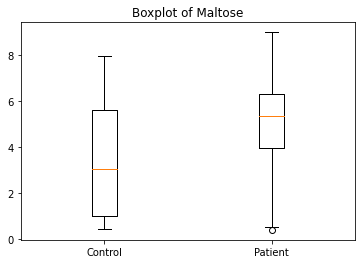

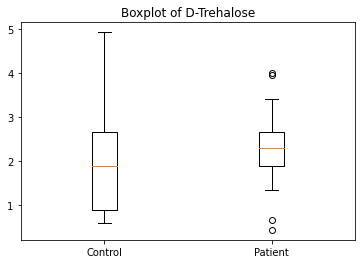

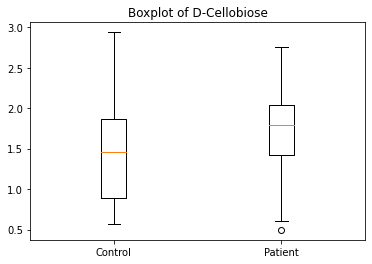

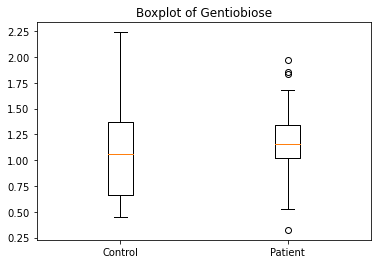

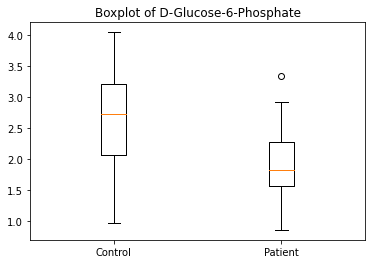

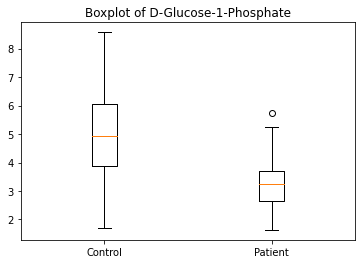

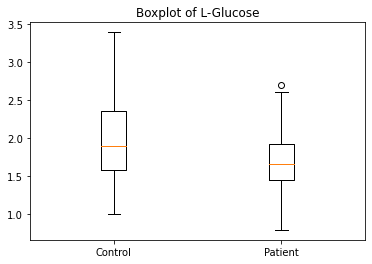

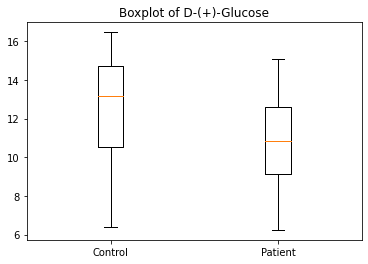

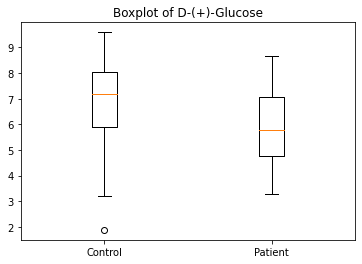

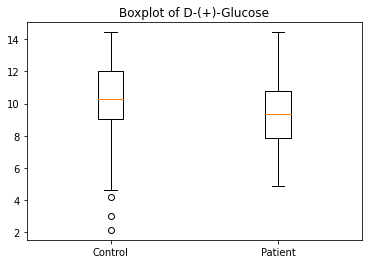

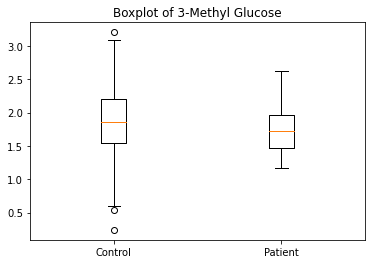

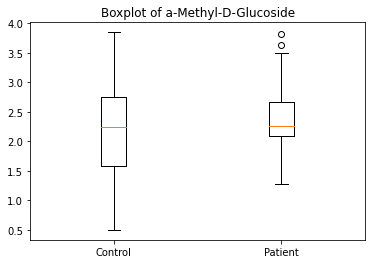

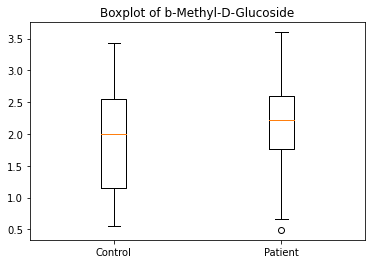

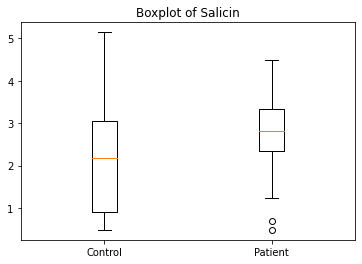

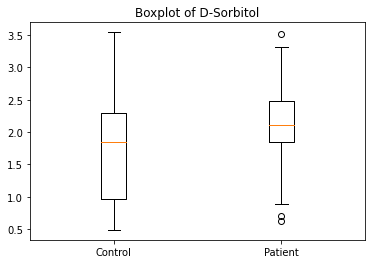

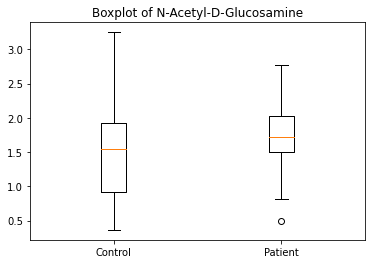

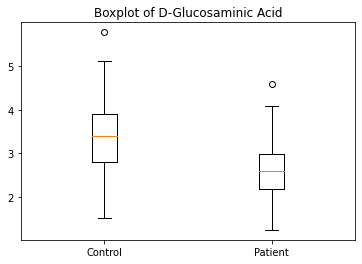

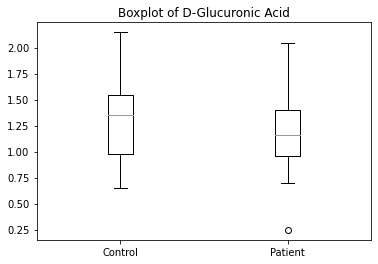

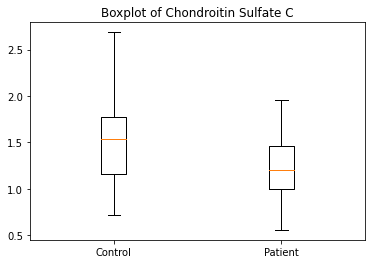

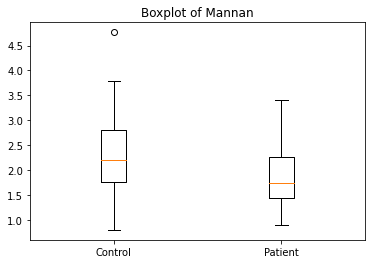

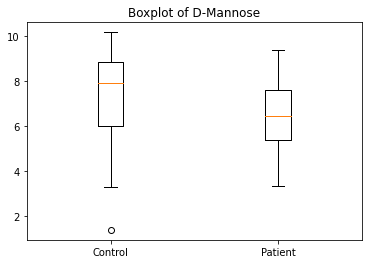

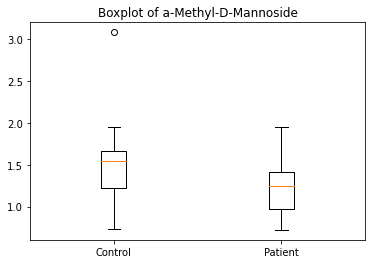

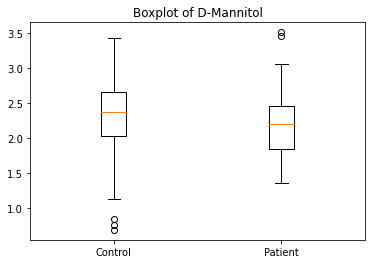

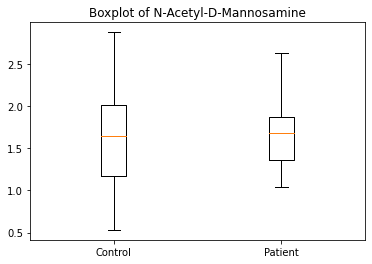

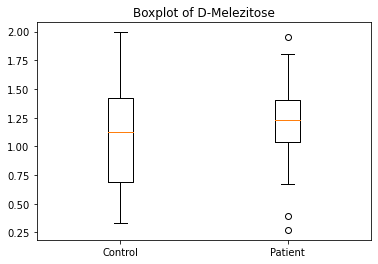

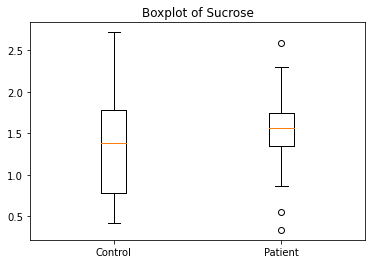

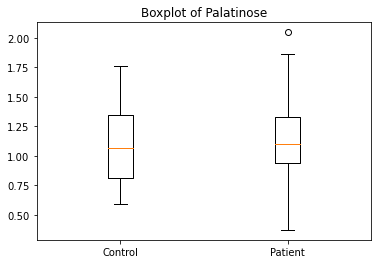

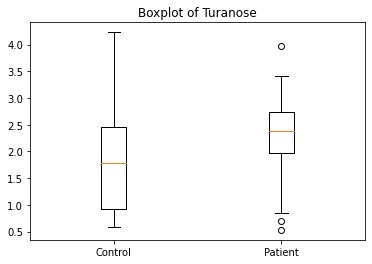

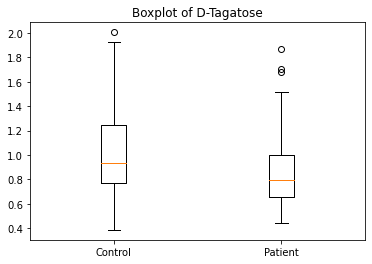

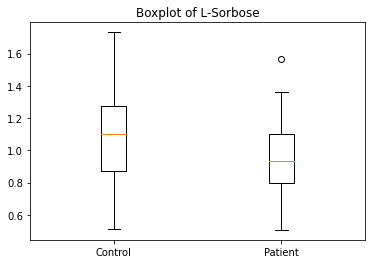

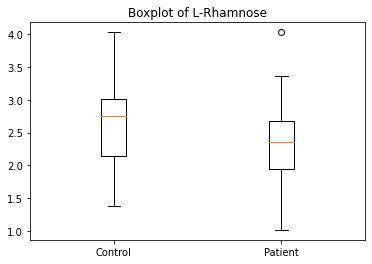

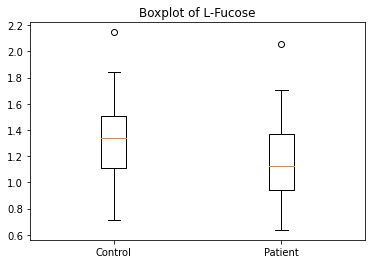

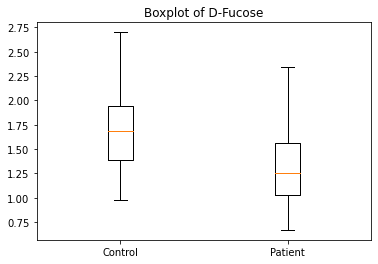

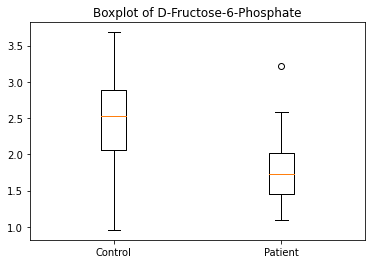

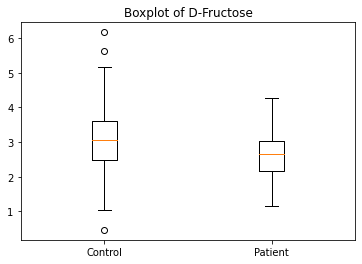

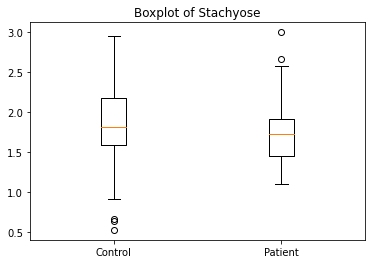

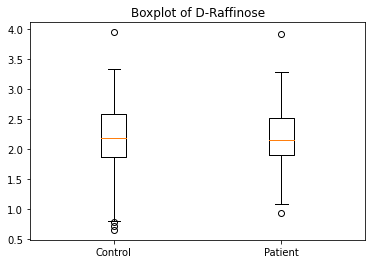

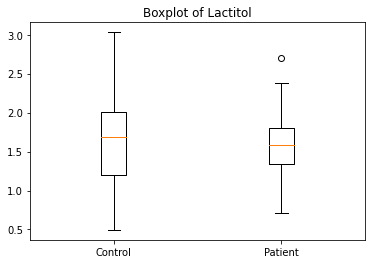

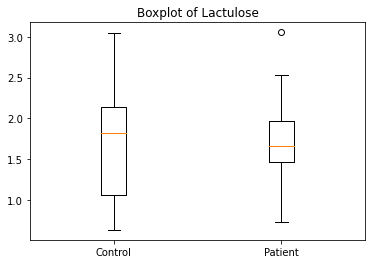

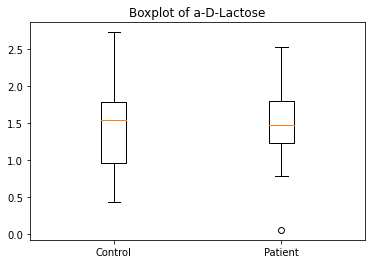

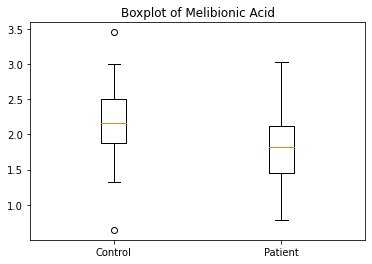

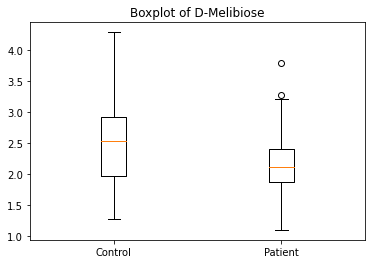

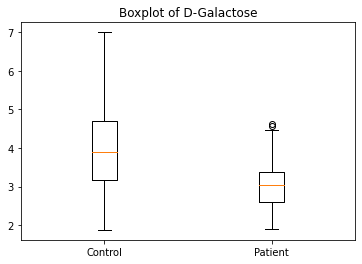

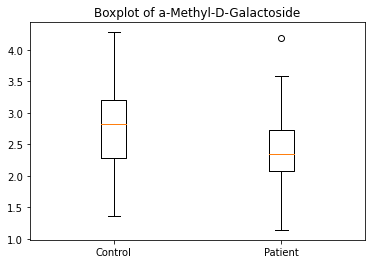

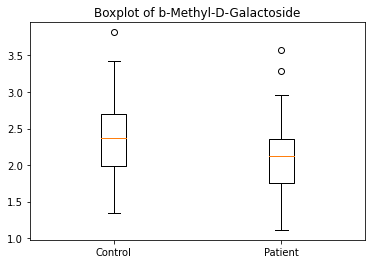

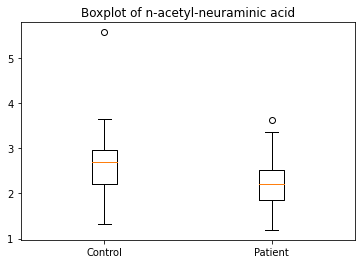

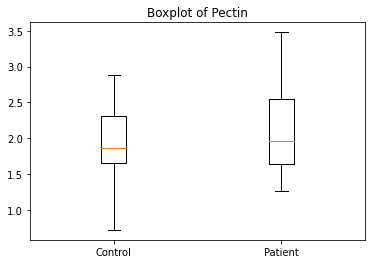

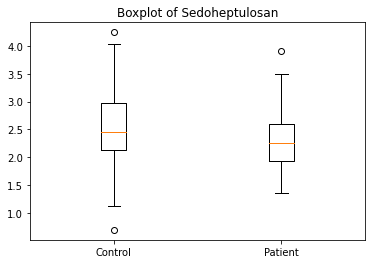

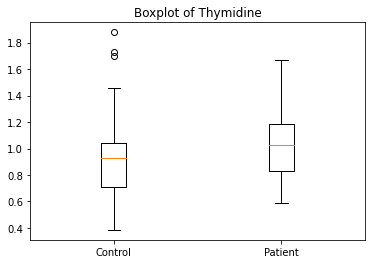

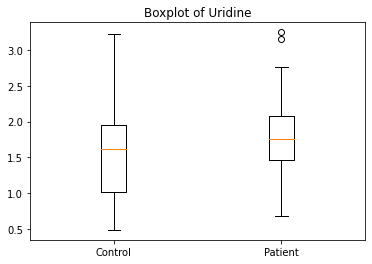

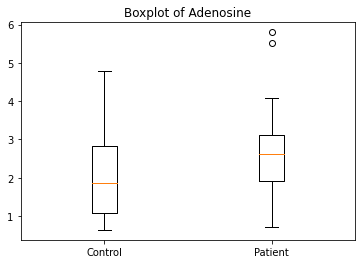

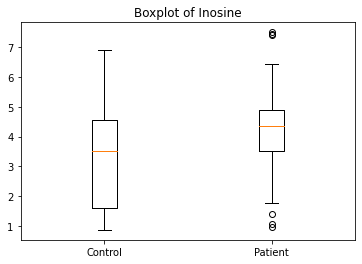

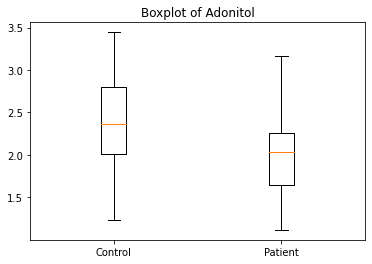

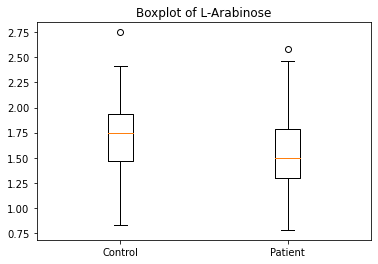

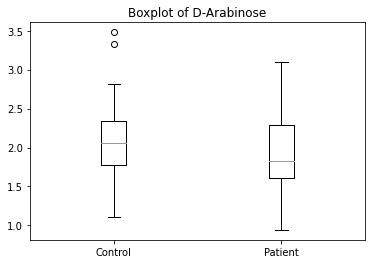

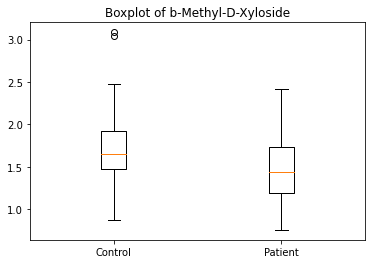

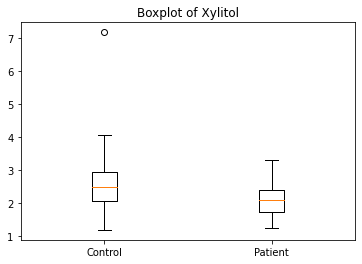

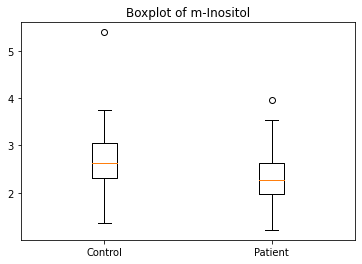

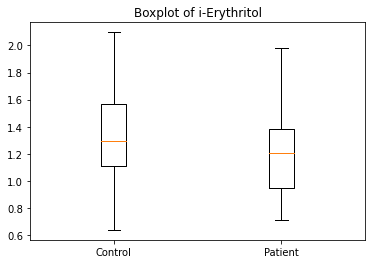

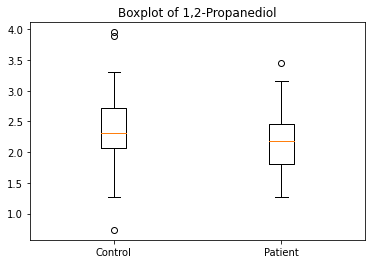

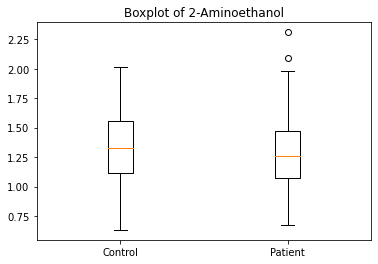

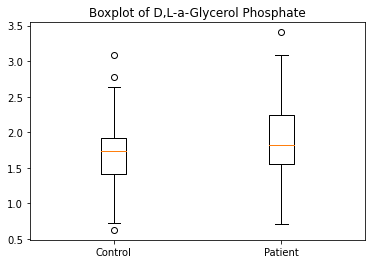

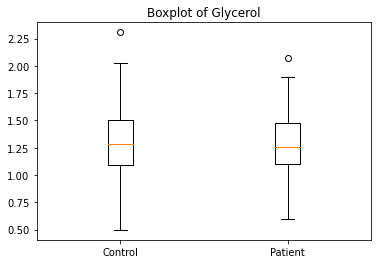

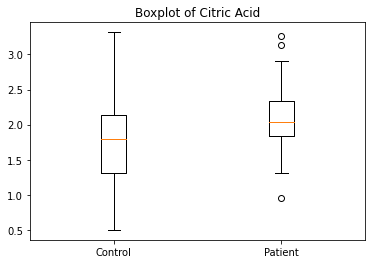

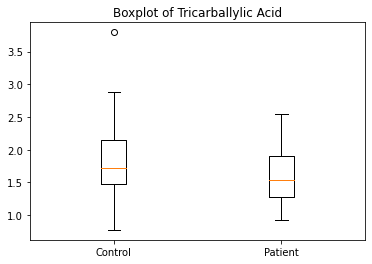

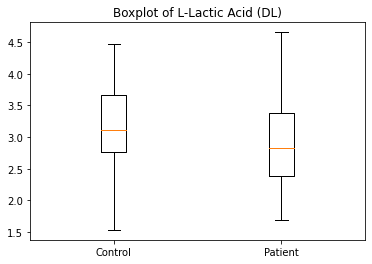

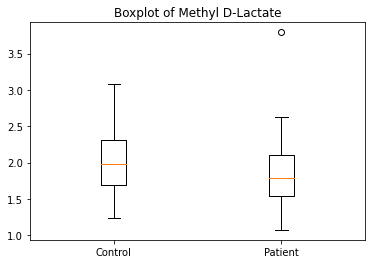

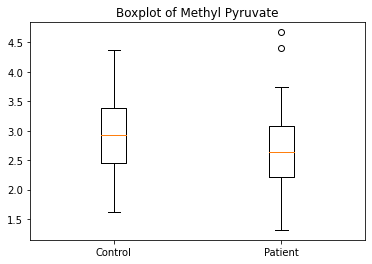

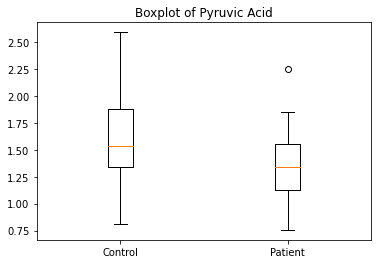

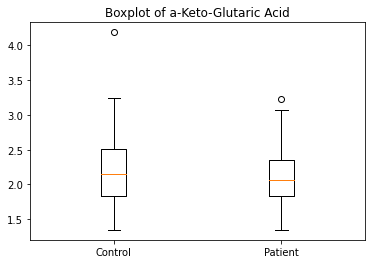

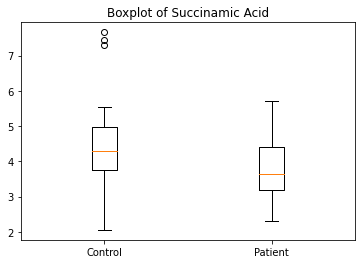

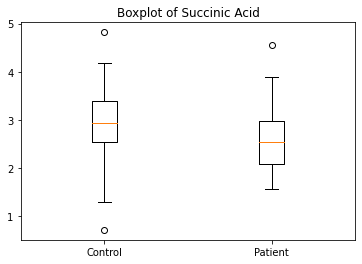

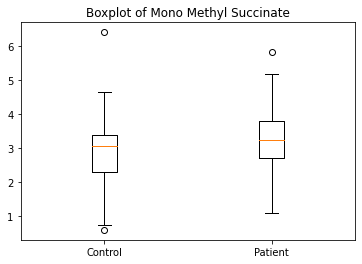

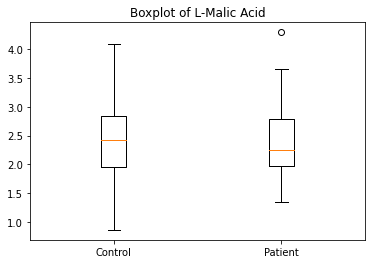

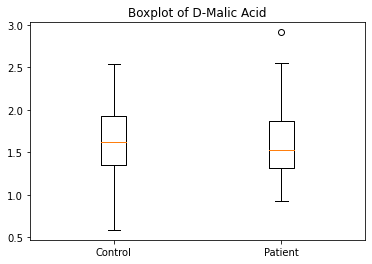

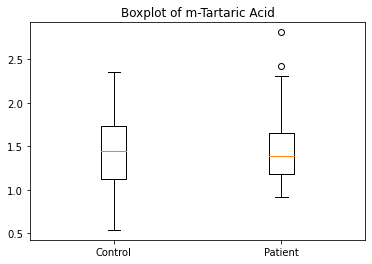

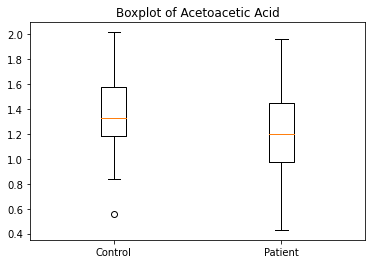

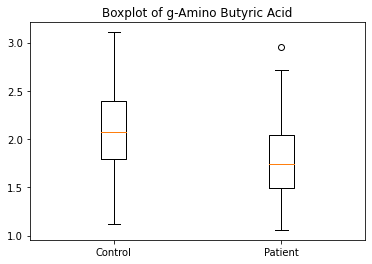

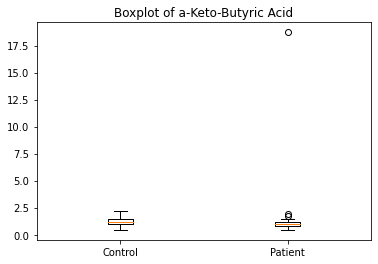

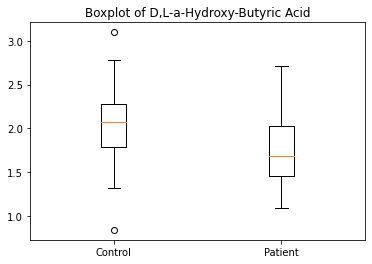

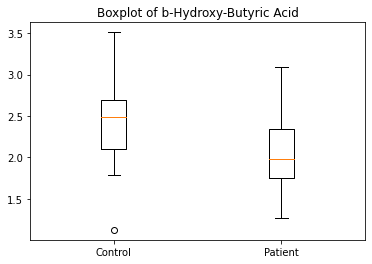

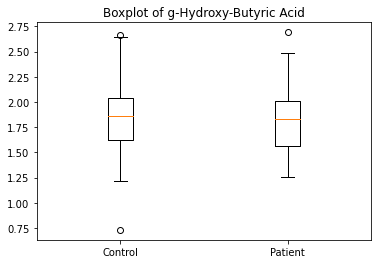

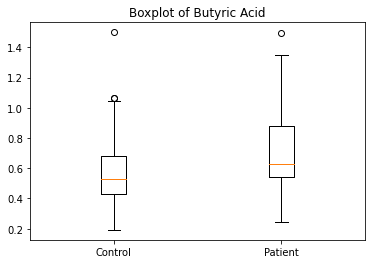

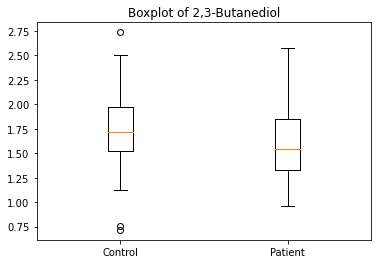

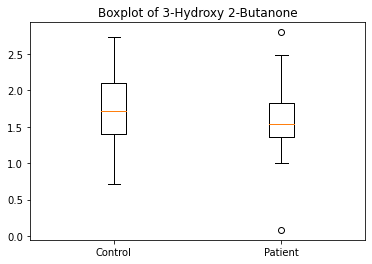

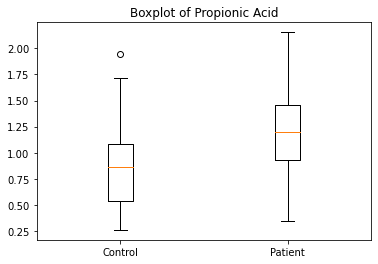

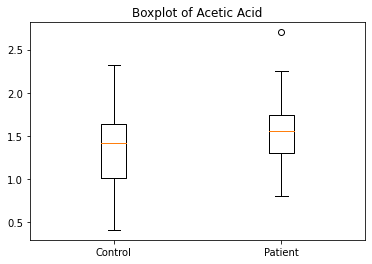

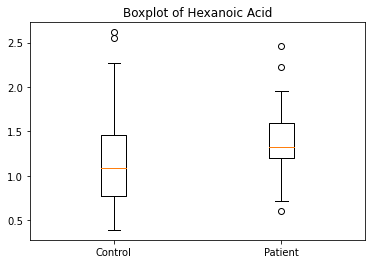

In [92]:
#Creates a list of 2 sets of boxplots that compare the patient and control data side by side
plotList = []
for i in range(0, 96):
    fig, ax = plt.subplots()
    toPlot = []
    toPlot.append(arrayControl[i])
    toPlot.append(arrayPatient[i])
    ax.boxplot(toPlot)
    ax.set_xticklabels(["Control", "Patient"])
    ax.set_title("Boxplot of " + dfNames[i+2])

    plotList.append(fig)

#Saves the boxplots in a pdf
pdf = PdfPages("PM-M" + sheet + " Boxplot.pdf")  #create a pdf document
for plot in plotList:
    pdf.savefig(plot, orientation="landscape")  #save plot to pdfs
pdf.close()

In [93]:
listControl = []
listPatient = []

#Reads in each of the 8 sheets for the patient and the control datasets
for i in range(1,9):
    #Imports the patient dataset and drops unneccessary rows/columns
    df = pd.read_excel('Data/ALL_PMS_Patient_Biolog_data_NORMALIZED.xlsx', sheet_name='PM-M' + str(i), engine='openpyxl')
    df = df[1:]
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.drop('well', axis=1)
    dfNames = df['CMS#']
    df = df.drop('CMS#', axis=1)

    #Imports the control dataset and removed unnecessary rows/columns
    df_control = pd.read_excel('Data/ABS_Normalized Control_PMS data.xlsx', sheet_name='PM-M' + str(i) + '_Control', engine='openpyxl')
    df_control = df_control[4:]
    cols = df_control.columns.tolist()
    to_remove = cols[0:59] + cols[109:]
    df_control = df_control.loc[:, ~df_control.columns.isin(to_remove)]

    #Converts to numpy array and adds the numpy array to a list
    arrayControl = df_control.to_numpy()
    arrayPatient = df.to_numpy()

    #Appends the array to a list
    listControl.append(arrayControl)
    listPatient.append(arrayPatient)
#Converts the lists to arrays and reshapes the arrays to be 2-dimensional instead of 3-dimensional
arrayControl_3D = np.array(listControl)
arrayControl = arrayControl_3D.reshape(-1,50)
arrayPatient_3D = np.array(listPatient)
arrayPatient = arrayPatient_3D.reshape(-1,48)

print(arrayControl.shape)
print(arrayPatient.shape)
pltList = []

(768, 50)
(768, 48)


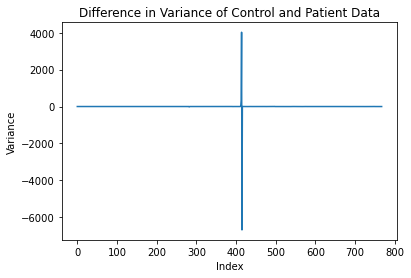

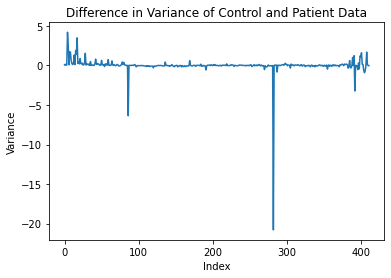

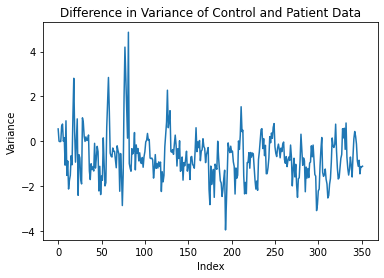

In [94]:
pltlist = []

#calculate the vairance of patient and control data from each of the datasets and graph them
varianceList = []
for i in range(0, 768):
    varianceList.append(np.var(arrayControl[i]) - np.var(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(varianceList)
ax.set_title("Difference in Variance of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Variance")
plt.show()
pltList.append(fig)


varianceList = []
for i in range(0, 412):
    varianceList.append(np.var(arrayControl[i]) - np.var(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(varianceList)
ax.set_title("Difference in Variance of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Variance")
plt.show()
pltList.append(fig)


varianceList = []
for i in range(416, 768):
    varianceList.append(np.var(arrayControl[i]) - np.var(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(varianceList)
ax.set_title("Difference in Variance of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Variance")
plt.show()

pltList.append(fig)



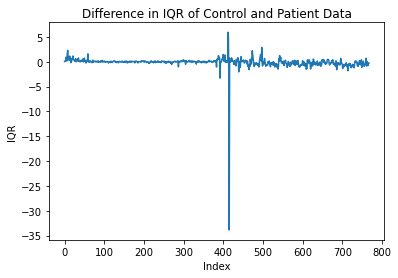

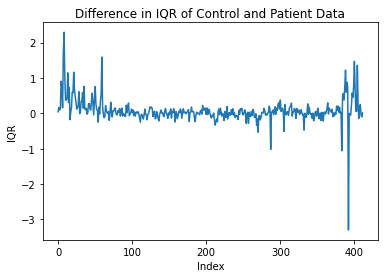

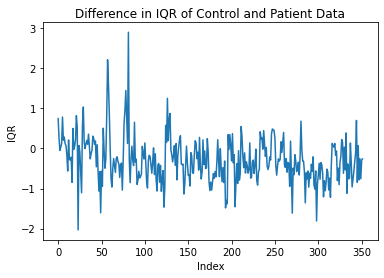

In [95]:
#calculate the IQR of patient and control data from each of the datasets and graph them
iqrList = []
for i in range(0, 768):
    iqrList.append(np.subtract(*np.percentile(arrayControl[i], [75, 25]))-np.subtract(*np.percentile(arrayPatient[i], [75, 25])))
fig, ax = plt.subplots()
ax.plot(iqrList)
ax.set_title("Difference in IQR of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("IQR")
plt.show()

pltList.append(fig)

iqrList = []
for i in range(0, 412):
    iqrList.append(np.subtract(*np.percentile(arrayControl[i], [75, 25]))-np.subtract(*np.percentile(arrayPatient[i], [75, 25])))
fig, ax = plt.subplots()
ax.plot(iqrList)
ax.set_title("Difference in IQR of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("IQR")
plt.show()

pltList.append(fig)


iqrList = []
for i in range(416, 768):
    iqrList.append(np.subtract(*np.percentile(arrayControl[i], [75, 25]))-np.subtract(*np.percentile(arrayPatient[i], [75, 25])))
fig, ax = plt.subplots()
ax.plot(iqrList)
ax.set_title("Difference in IQR of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("IQR")
plt.show()

pltList.append(fig)



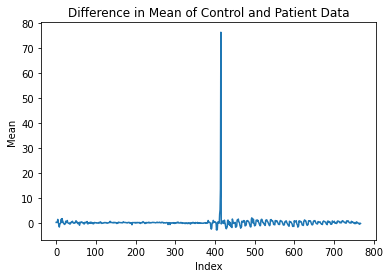

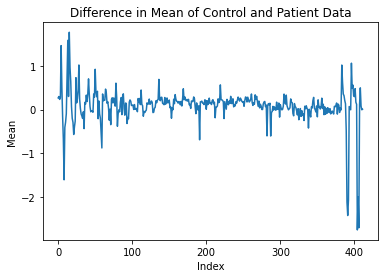

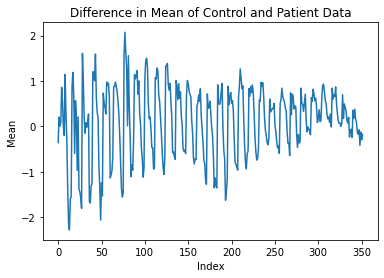

In [101]:
#Calculate the mean of patient and control data from each of the datasets and graph them
meanList = []
for i in range(0, 768):
    meanList.append(np.mean(arrayControl[i])-np.mean(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(meanList)
ax.set_title("Difference in Mean of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Mean")
plt.show()
pltList.append(fig)

meanList = []
for i in range(0, 412):
    meanList.append(np.mean(arrayControl[i])-np.mean(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(meanList)
ax.set_title("Difference in Mean of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Mean")
plt.show()

pltList.append(fig)



meanList = []
for i in range(416, 768):
    meanList.append(np.mean(arrayControl[i])-np.mean(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(meanList)
ax.set_title("Difference in Mean of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Mean")
plt.show()

pltList.append(fig)


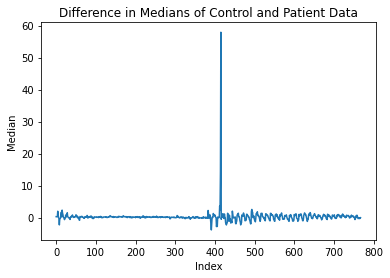

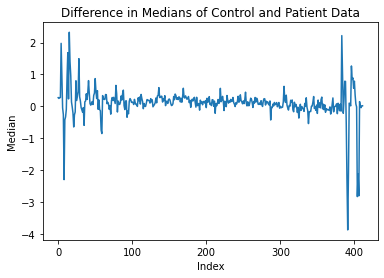

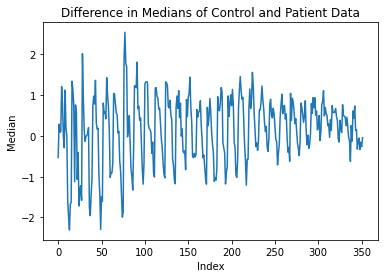

In [97]:
#the median of patient and control data from each of the datasets and graph
medianList = []
for i in range(0, 768):
    medianList.append(np.median(arrayControl[i])-np.median(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(medianList)
ax.set_title("Difference in Medians of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Median")
plt.show()

pltList.append(fig)

medianList = []
for i in range(0, 412):
    medianList.append(np.median(arrayControl[i])-np.median(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(medianList)
ax.set_title("Difference in Medians of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Median")
plt.show()

pltList.append(fig)

medianList = []
for i in range(416, 768):
    medianList.append(np.median(arrayControl[i])-np.median(arrayPatient[i]))
fig, ax = plt.subplots()
ax.plot(medianList)
ax.set_title("Difference in Medians of Control and Patient Data")
ax.set_xlabel("Index")
ax.set_ylabel("Median")
plt.show()

pltList.append(fig)


In [98]:
pdf2 = PdfPages("StatisticalAnalysis.pdf")  #create a pdf document
for plot in pltList:
    pdf2.savefig(plot, orientation="landscape")  #save plot to pdfs
pdf2.close()